# Social Media Analytics

Social media is an interactive technology that allows users to share information, ideas, and other forms of expression through communities and virtual networks. With the existence of social media data is becoming more and more. However, if the data is not used, it will only become garbage. Data from social media is very useful for several aspects, for example is for sentiment analysis.
<br>
<br>
There are two columns namely text and target in this dataset, that is : <br>
Text is the content of tweets that have been posted by users,<br>
Target is the kind of sentiment that results from user tweets (0 = Negative sentimen, 1 = Positive sentimen)
<br>
<br>
In this program I want to do classification to know if there is a new tweet we can find out whether the tweet has positive or negative sentiments.

![studio](https://www.elegantthemes.com/blog/wp-content/uploads/2017/03/like-dislike-featured.jpg)

## Import Module (Package)

In [1]:
import pandas as pd 
import numpy as np

#import nltk module 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# SECTION A : Data Preparation

## Load Tweet Data

In [3]:
df = pd.read_csv('clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
df.tail()

,text,target
1599995,just woke up having no school is the best feel...,1
1599996,thewdb com very cool to hear old walt intervie...,1
1599997,are you ready for your mojo makeover ask me fo...,1
1599998,happy th birthday to my boo of alll time tupac...,1
1599999,happy charitytuesday,1


## Data Exploration

The code below is to know dimention of the data

In [5]:
df.shape

(1600000, 2)

To know data type for each features

In [6]:
df.dtypes

text      object
target     int64
dtype: object

Check the missing value

In [7]:
df.isnull().sum()

text      3247
target       0
dtype: int64

From the result above, can be known there is missing value from the data. The code below is to drop row that contains the missing value

In [8]:
df = df.dropna()

Check the missing value again to make sure the data do not have missing value

In [9]:
df.isnull().sum()

text      0
target    0
dtype: int64

After several data has been drop because of missing value, the code below is to know dimention of the new data

In [10]:
df.shape

(1596753, 2)

# Section B : Data Preprocessing

After we load the data, the next step is Data Preprocessing. It is a process / step taken to make raw data into quality data.

### Stop words removal
To remove the stop words that contained in the tweet (stop words are words which are filtered out before processing of natural language data (text). Stop words are generally the most common words in a language, in this progra, I used stop word with english.

In [11]:
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df['text'].head(10)

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                                     behaving mad see
5                                           whole crew
6                                             need hug
7    hey long time see yes rains bit bit lol fine t...
8                                               k nope
9                                            que muera
Name: text, dtype: object

### Tokenization

Tokenization is the process of dividing text that can be in the form of sentences, paragraphs or documents, into tokens.

In [12]:
TextBlob(df['text'][1]).words

WordList(['upset', 'update', 'facebook', 'texting', 'might', 'cry', 'result', 'school', 'today', 'also', 'blah'])

### Lematization

Lemmatization is a process that aims to normalize text/words based on the basic form, normalization here is in the sense of identifying and removing prefixes and suffixes from a word.

In [13]:
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0         awww bummer shoulda got david carr third day
1    upset update facebook texting might cry result...
2      dived many time ball managed save rest go bound
3                      whole body feel itchy like fire
4                                     behaving mad see
Name: text, dtype: object

In [14]:
df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset update facebook texting might cry result...,0
2,dived many time ball managed save rest go bound,0
3,whole body feel itchy like fire,0
4,behaving mad see,0


# SECTION C : Data Exploration & Visualization

## Visualization 
### Design data visualization to be delivered effectively to the audience. Because this is how people see :
![vic](vis.PNG)

### Pie Chart

<function matplotlib.pyplot.show>

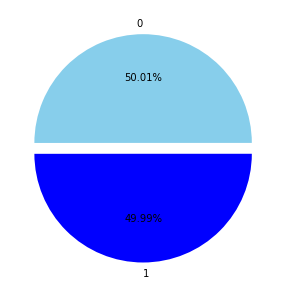

In [15]:
sentiment = df['target'].value_counts()
colors = ['skyblue', 'blue']
explode = (0, 0.1)

plt.figure(figsize=(5,5))
plt.pie(sentiment, labels=sentiment.index, autopct='%1.2f%%',colors=colors,explode=explode)
plt.show

Pie chart above shows that target 0 is more than target 1, but the difference is very small. It can be said that in the tweet data the comparison between positive and negative sentiments is almost the same

### Wordcloud

For business purposes, word clouds can help you find your customers points. If you collect feedback from your customers, you can generate a word cloud using customers language to help identify what is most important to them.

In [126]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#### Initialize target 0 and 1 into positive and negative sentimen

In [17]:
positive = df.loc[df['target'] == 1]
negative = df.loc[df['target'] == 0]

In [18]:
pos = "".join(positive.text.values)
neg = "".join(negative.text.values)

#### Wordcloud for positive sentiment

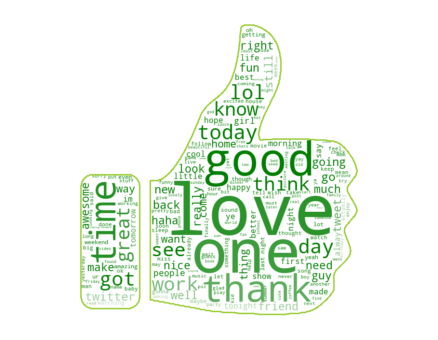

In [130]:
from PIL import Image

mask = np.array(Image.open("thumb.png"))
colors=ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = colors, contour_width = 2, contour_color = 'yellowgreen', max_words = 200, stopwords = set(STOPWORDS)).generate(pos)
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

From wordcloud above can known that postive sentimen from user is mostly use these several words, that is Love, Thank, Good, and One.

#### Wordcloud for negative sentiment

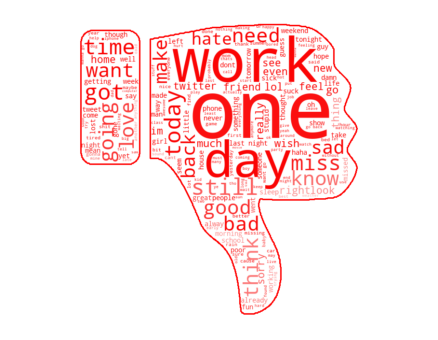

In [133]:
mask = np.array(Image.open("thumb1.png"))
colors=ImageColorGenerator(mask)
cloud = WordCloud(background_color = "white", mask = mask, color_func = colors, contour_width = 2, contour_color = 'red', max_words = 200, stopwords = set(STOPWORDS)).generate(neg)
#cloud.to_file("smile_new.png")
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

 From wordcloud above can known that negative sentimen from user is mostly use these several words, that is Work, One, and Day. Can be seen that words "ONE" is mostyly used or categorized in two sentiments, postive and negative. For example, in the data tweet maybe someone said that "I finally found my ONE and only" and the other one said "No ONE ever love me". So we must create model for classification sentiment analtysis.

# Section D : Modelling

### Import package for modelling

In [175]:
# Bag of Word
from sklearn.feature_extraction.text import CountVectorizer
#TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
#Train Test Split
from sklearn.model_selection import train_test_split
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Import evaluation Model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score,f1_score,precision_score

### Create data sampling
I used 2% of the tweet data for sampling and put data into new data. I choose 2% because too many data makes me take a long time to run the program. Because when the notebook is executed, the kernel performs the computation and produces the results. Depending on the type of computations, the kernel may consume significant CPU and RAM. Note that the RAM is not released until the kernel is shut-down. Depending on the type of computations, the kernel may consume significant CPU and RAM. My laptop isn't good enough to do that, due to the specifications of my laptop which has limited memory. For your information, I used HP ProBook 440 G5.

Previously I have tried using 50%, 20%, 10% and 5% but every time I want to run a program it takes a long time. Therefore, to create a model I use 1% of the available data to be sampled. I took 1% of data from positive sentiment and 1% of data from negative sentiment to have the same proportion as the initial data.


In [24]:
pos_sampling = positive.sample(frac=0.01).reset_index().drop(columns='index')
neg_sampling = negative.sample(frac=0.01).reset_index().drop(columns='index')

In [25]:
print ('Dimention of positive sampling ', pos_sampling.shape)
print ('Dimention of negative sampling ', neg_sampling.shape)

Dimention of positive sampling  (7982, 2)
Dimention of negative sampling  (7985, 2)


In [26]:
data = pos_sampling.append(neg_sampling,ignore_index=True)
data.tail()

,text,target
15962,cant sleep,0
15963,tix auction budget level would love bud afford,0
15964,leg ache back ache hand ache everything ache l...,0
15965,well grandpa dying cancer get worse fly week m...,0
15966,still power pissed,0


In [145]:
data['targetdesc'] = data['target'].apply(lambda x :'negative' if x == 0 else 'positive')
data.head()

,text,target,targetdesc
0,morning time team fest go let weather decide f...,1,positive
1,say karma strike twice,1,positive
2,shot emo im heppy emoo sick sadlyy well panara...,1,positive
3,go maria go lakers,1,positive
4,well actually two different version song one h...,1,positive


### Train Test Split

In [147]:
X = data['text']
Y = data['target']

#### Bag of Word Count Vectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [165]:
vectorizer = CountVectorizer(max_features=800, min_df=0.02, max_df=0.7, stop_words=stopwords.words('english'))
X_vec = vectorizer.fit_transform(X)

#### Finding TF-IDF

TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [163]:
tfidfconverter = TfidfVectorizer(stop_words='english')
X_tfidf = tfidfconverter.fit_transform(X)

Split data that will be used as training and testing. In this program I divide the data into 80% for training and 20% for testing.

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X_vec, Y, stratify=Y, test_size=0.2, random_state=42) 

In [167]:
X_train_tf, X_test_tf, Y_train, Y_test = train_test_split(X_tfidf, Y, stratify=Y, test_size=0.2, random_state=42)

### Notes
Before we start modelling with several method, to get the most accurate model we must know the accuracy from that model, that is :
- Precision : good measure to determine, when the costs of False Positive is high. 
- Recall : actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). 
- F1 : F1 Score is needed when you want to seek a balance between Precision and Recall.<br><br>
So, to know the model is good for this dataset is based on above criteria. Now let's get started!!!


## --- Logistic Regression
The ogistic regression model is used to see whether the dependent variable is influenced by both categorical and numerical independent variables.

In [172]:
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(X_train,Y_train)
Lr_pred_vect_train = Lr_vect.predict(X_train)
Lr_pred_vect_test = Lr_vect.predict(X_test)

In [173]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(X_train_tf,Y_train)
Lr_pred_tfidf_train = Lr_tfidf.predict(X_train_tf)
Lr_pred_tfidf_test = Lr_tfidf.predict(X_test_tf)

### Using count vectorizer

In [176]:
print("______________ Countvectorizer ______________")

Lr_confmatrix_vect_train = confusion_matrix(Y_train, Lr_pred_vect_train) 
Lr_confmatrix_vect_test = confusion_matrix(Y_test, Lr_pred_vect_test)

Lr_recall_vec_train = recall_score(Y_train, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(Y_test, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(Y_train, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(Y_test, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(Y_train, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(Y_test,Lr_pred_vect_test,average="micro")

print('Information :')
print('Confusion matrix for Train :')
print(Lr_confmatrix_vect_train,'\n')
print('Confusion matrix for Test :')
print(Lr_confmatrix_vect_test,'\n')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Confusion matrix for Train :
[[4990 1398]
 [3860 2525]] 

Confusion matrix for Test :
[[1242  355]
 [ 966  631]] 

Recall train & test     : 58.84% & 58.64%
Precision train & test  : 58.84% & 58.64%
F1 Score train & test   : 58.84% & 58.64%


### Using TF-IDF

In [177]:
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(Y_train, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(Y_test, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(Y_train, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(Y_test, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(Y_train, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(Y_test,Lr_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 85.17% & 71.60%
Precision train & test  : 85.17% & 71.60%
F1 Score train & test   : 85.17% & 58.64%


#### Logistic Regression : 
From the result above can be known that Logistic Regression is good for classification this dataset used TF-IDF and not good when using CountVectorizer. 

## ---  Naive Bayes
Naive Bayes classification is a simple chance classification based on the application of Bayes theorem with the assumption between independent explanatory variables. In this case, it is assumed that the presence or absence of a particular event from a group is not related to the presence or absence of other events.

In [182]:
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(X_train,Y_train)
NB_pred_vect_train = NB_vect.predict(X_train)
NB_pred_vect_test = NB_vect.predict(X_test)

In [183]:
# TFIDFVectorizer
NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train_tf,Y_train)
NB_pred_tfidf_train = NB_tfidf.predict(X_train_tf)
NB_pred_tfidf_test = NB_tfidf.predict(X_test_tf)

### Using count vectorizer

In [184]:
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(Y_train, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(Y_test, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(Y_train, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(Y_test, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(Y_train, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(Y_test,NB_pred_vect_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 58.93% & 58.74%
Precision train & test  : 58.93% & 58.74%
F1 Score train & test   : 58.93% & 58.74%


In [185]:
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(Y_train, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(Y_test, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(Y_train, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(Y_test, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(Y_train, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(Y_test,NB_pred_tfidf_test,average="micro")

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 87.97% & 70.44%
Precision train & test  : 87.97% & 70.44%
F1 Score train & test   : 87.97% & 58.74%


#### Naive Bayes : 
From the result above can be known that Naive Bayes is the best model for this dataset for classification used TF-IDF and not good when using CountVectorizer. Can be seen by recall, precision, and F1 value.

## ---  K-NEAREST NEIGHBOR
K-Nearest Neighbor (K-NN) algorithm is a classification method for a set of data based on learning data that has been previously classified. Included in supervised learning, where the results of the new query instance are classified based on the majority of the closeness of the distance from the existing categories in K-NN.

### Comparing Error Rate with the K Value
This comparing error is to see what best K value that I used to do KNN model. The smaller the mean error, the better K value.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

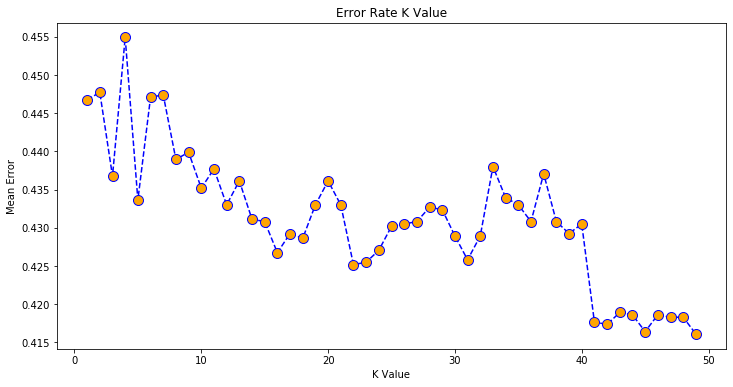

In [187]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Based on plot above can be known that K=45 is the best K for modelling.

### Training and Predictions

In [194]:
knn = KNeighborsClassifier(n_neighbors=45)

### Using CountVectorizer

In [195]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [196]:
Y_pred = knn.predict(X_test)

In [197]:
Y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Evaluating the Algorithm

In [198]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 672  925]
 [ 405 1192]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.50      1597
           1       0.56      0.75      0.64      1597

    accuracy                           0.58      3194
   macro avg       0.59      0.58      0.57      3194
weighted avg       0.59      0.58      0.57      3194



In [199]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.5835942391984972


From the result above we know what accuracy of K-Nearest Neighbor is 0.583. The value is to low for classification, maybe it's caused by data size

In [200]:
compare = Y_test.reset_index()
compare.drop(columns='index', inplace=True)
compare['TARGET PREDIKSI'] = Y_pred
compare.head()

,target,TARGET PREDIKSI
0,1,0
1,1,1
2,1,1
3,0,0
4,0,1


The table above is the result of a comparison between the actual target and the predicted target

### Data visualization using K-NEAREST NEIGHBOR

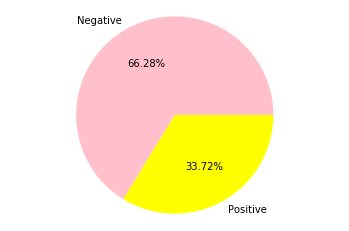

In [201]:
size = [sum(compare['TARGET PREDIKSI']),
        len(compare['TARGET PREDIKSI'])-sum(compare['TARGET PREDIKSI'])]
labels = ['Negative','Positive']
color = ["pink","yellow"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

### Using TF-IDF

In [207]:
knn.fit(X_train_tf, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')

In [209]:
Y_pred = knn.predict(X_test_tf)

In [210]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1585   12]
 [1535   62]]
              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1597
           1       0.84      0.04      0.07      1597

    accuracy                           0.52      3194
   macro avg       0.67      0.52      0.37      3194
weighted avg       0.67      0.52      0.37      3194



In [211]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.5156543519098309


The result above is accuracy score from K-Nearest Neighbor using TF-IDF. Can be concluded that the model isn't good for this dataset because the accuracy is low.

In [212]:
compare = Y_test.reset_index()
compare.drop(columns='index', inplace=True)
compare['TARGET PREDIKSI'] = Y_pred
compare.head()

,target,TARGET PREDIKSI
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


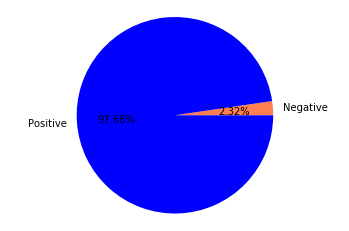

In [217]:
size = [sum(compare['TARGET PREDIKSI']),
        len(compare['TARGET PREDIKSI'])-sum(compare['TARGET PREDIKSI'])]
labels = ['Negative','Positive']
color = ["coral","blue"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

From the pie chart above can be known that the positive sentiment is bigger than negative sentiment. But, because of its small accuracy, this model is still not good for classifying this dataset.

## --- Random Forest
Random forest (RF) is an algorithm used in the classification of large amounts of data. Classification of random forests is done through merging trees by conducting training on the sample data held.

### Using Count Vectorizer

In [140]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)

In [141]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[ 688  909]
 [ 439 1158]]
              precision    recall  f1-score   support

           0       0.61      0.43      0.51      1597
           1       0.56      0.73      0.63      1597

    accuracy                           0.58      3194
   macro avg       0.59      0.58      0.57      3194
weighted avg       0.59      0.58      0.57      3194



In [142]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.577958672510958


The result above is accuracy score from Random Foresr Classifier using count vectorizer. Can be concluded that the model isn't good for this dataset because the accuracy is low, which is 0.578.

In [122]:
compare2 = Y_test.reset_index()
compare2.drop(columns='index', inplace=True)
compare2['TARGET PREDIKSI'] = Y_pred
compare2.head()

,target,TARGET PREDIKSI
0,1,0
1,1,1
2,1,1
3,0,0
4,0,1


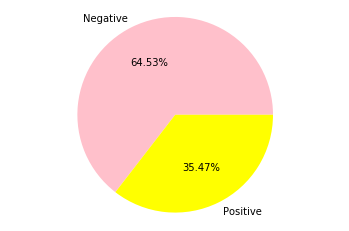

In [123]:
size = [sum(compare2['TARGET PREDIKSI']),
        len(compare2['TARGET PREDIKSI'])-sum(compare2['TARGET PREDIKSI'])]
labels = ['Negative','Positive']
color = ["pink","yellow"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

From pie chart above can be known by using Random Forest Classifier with count vectorizer that negative sentimen is bigger than positive sentimen. But the value is to far away from the actual target.

### Using TF-IDF

In [202]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_tf, Y_train)
Y_pred = rfc.predict(X_test_tf)

In [203]:
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[1078  519]
 [ 443 1154]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1597
           1       0.69      0.72      0.71      1597

    accuracy                           0.70      3194
   macro avg       0.70      0.70      0.70      3194
weighted avg       0.70      0.70      0.70      3194



In [204]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.6988102692548529


The result above is accuracy score from Random Forest Classifier using TF-IDF. Can be concluded that the model isn't good for this dataset because the accuracy is low, which is 0.699. But this model better than Random Forest using Count Vectorizer because it have greater accuracy.

In [205]:
compare2 = Y_test.reset_index()
compare2.drop(columns='index', inplace=True)
compare2['TARGET PREDIKSI'] = Y_pred
compare2.head()

,target,TARGET PREDIKSI
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1


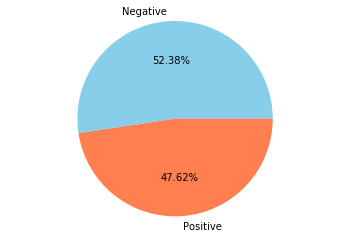

In [216]:
size = [sum(compare2['TARGET PREDIKSI']),
        len(compare2['TARGET PREDIKSI'])-sum(compare2['TARGET PREDIKSI'])]
labels = ['Negative','Positive']
color = ["skyblue","coral"]
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.axis('equal')
plt.show()

From pie chart above can be known that using Random Forest Classifier with TF-IDF that negative sentimen is bigger than positive sentimen. The value of that sentimen is close to the actual target.

# Conclusion

From this program with tweet dataset can be concluded that naive bayes with tf-idf is a suitable algorithm for classifying tweet data with value : <br><br>
- Recall train & test     : 87.97% & 70.44% <br>
- Precision train & test  : 87.97% & 70.44% <br>
- F1 Score train & test   : 87.97% & 58.74% <br><br>

And can be concluded for this dataset, using TF-IDF is better than using Count Vectorizer. Accuracy value from TF-IDF always bigger than Count Vectorizer in any model in this program.So if there are new tweets, it can be classified whether the tweets are positive or negative sentiments using the Naive Bayes model with TF-IDF. 
<br><br>
Sentiment analysis is the automated process of understanding an opinion about a given subject from written language. In addition, sentiment analysis like this can be used by several companies to find out how the community reacts to the company. Can also be used to find out a review of a product. If a company or product gets a lot of negative sentiment, the company or product must improve services or other advantages to be accepted by the community.